In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\HR ANALYTICS"

C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\HR ANALYTICS


In [3]:
hr_train=pd.read_csv("train_LZdllcl.csv")
hr_test=pd.read_csv("test_2umaH9m.csv")

In [4]:
print(hr_test.info())
print(hr_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 ent

# DESCRIPTIVE STATISTICS

In [5]:
print(hr_test.shape)
print(hr_train.shape)

(23490, 13)
(54808, 14)


In [6]:
print(hr_test.info())
print(hr_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 ent

In [7]:
hr_test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
hr_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [10]:
hr_train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [11]:
hr_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [12]:
hr_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

 --> Plotting plots for numerical and categorical features respectively.
 
 --> Removing unwanted columns
 
 --> Handling NaN/missing values
 
 --> Removing unwanted alphabet/special characters from the features

In [13]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

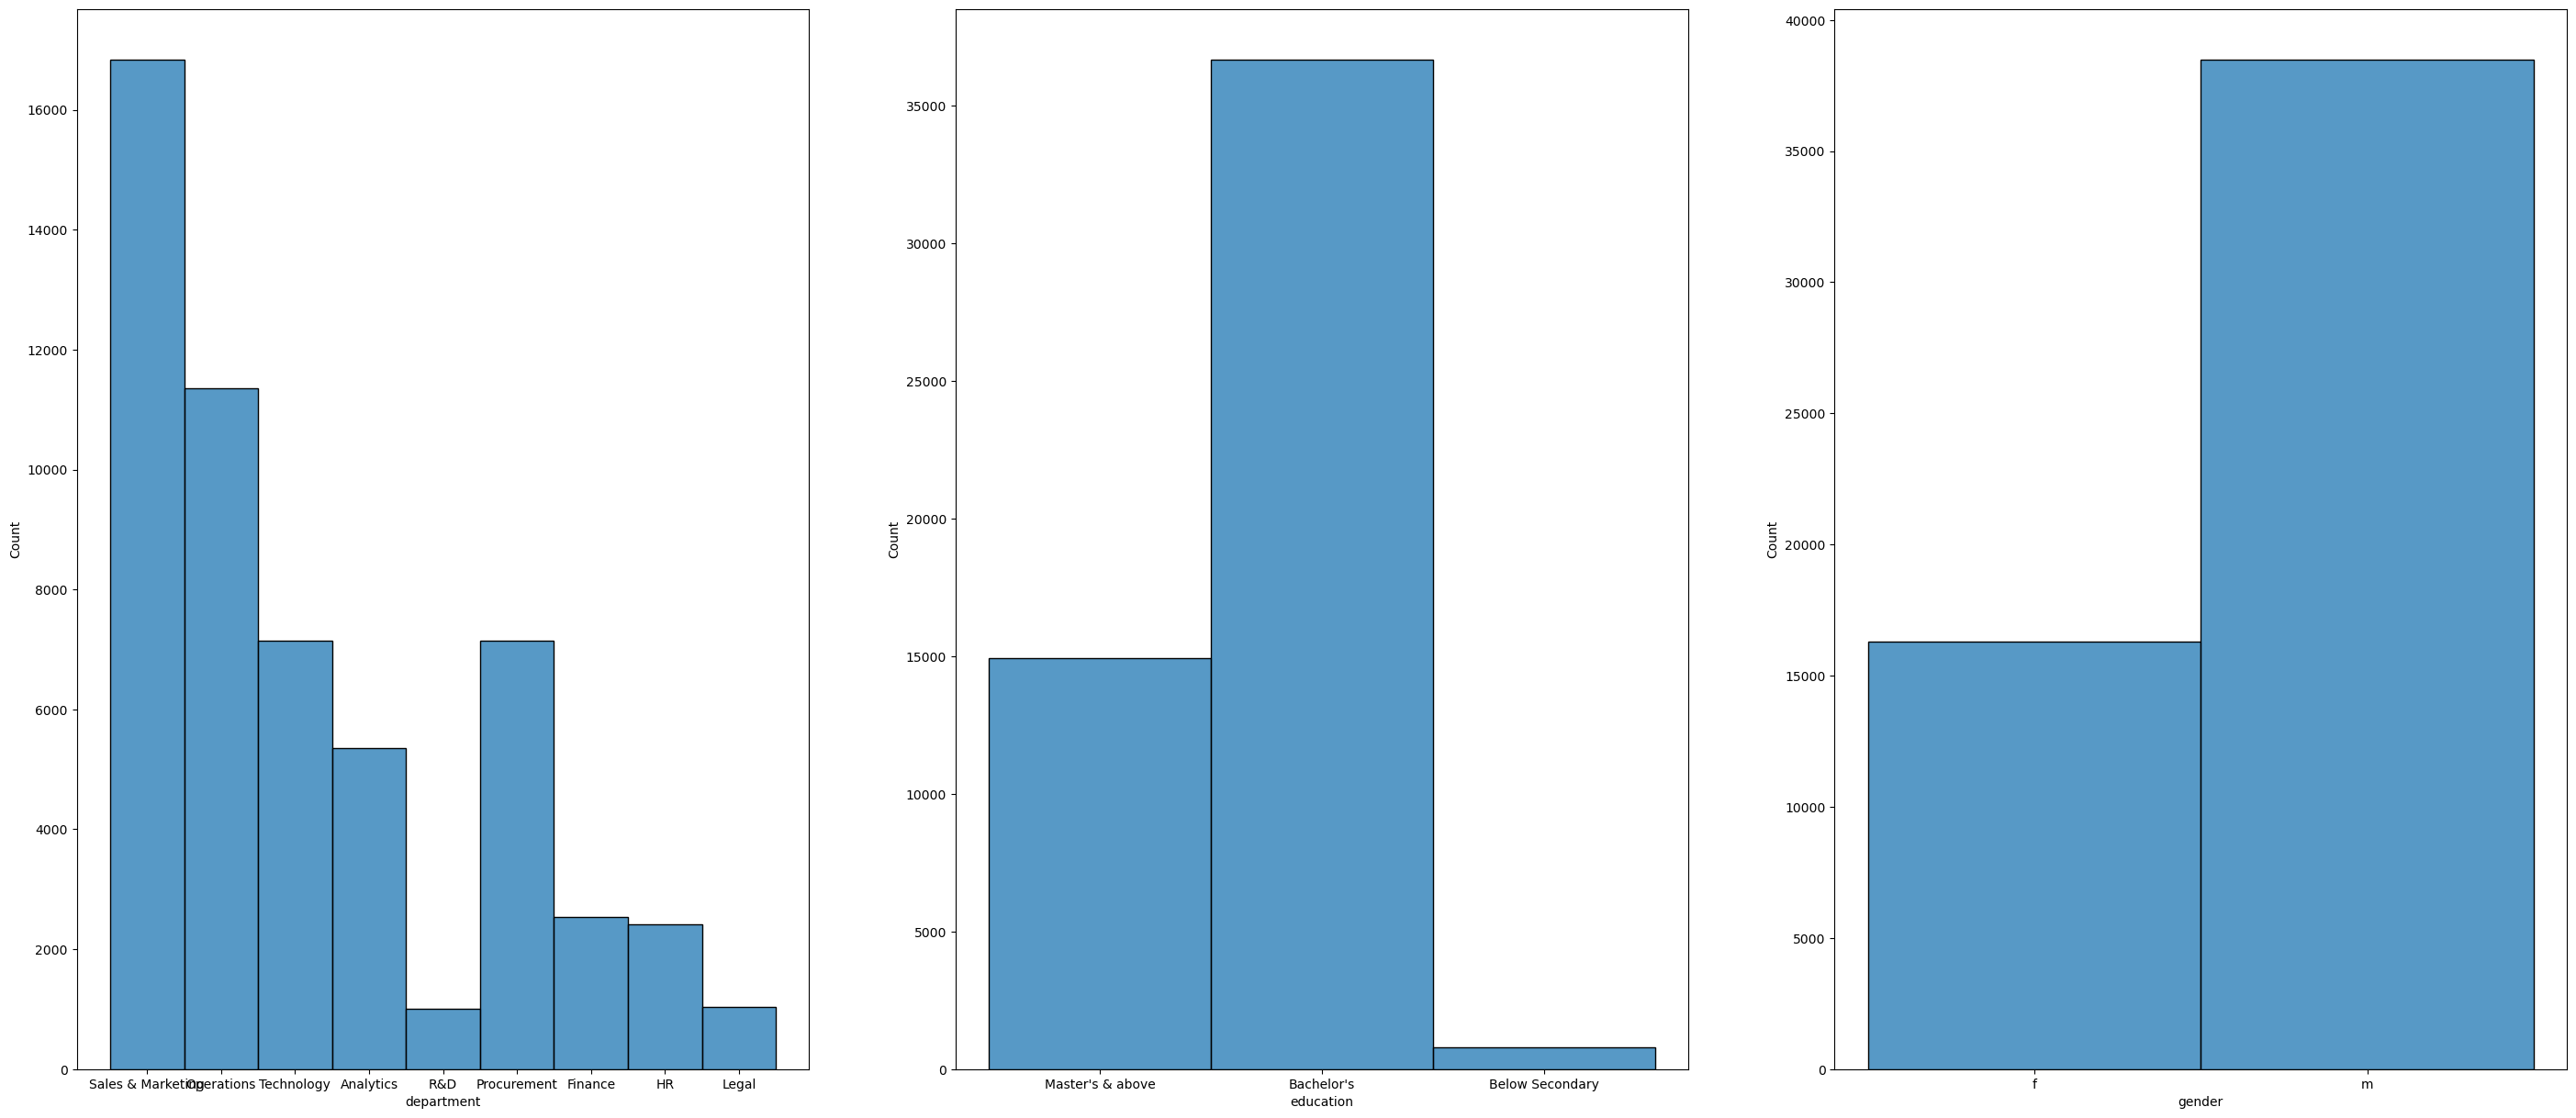

In [14]:
categorical=hr_train[['department', 'education', 'gender']]
fig , ax=plt.subplots(nrows = 1, ncols = 3, figsize=(35,15))
for variable, subplot in zip(categorical, ax.flatten()):
        sns.histplot(hr_train[variable], ax = subplot)
plt.show()

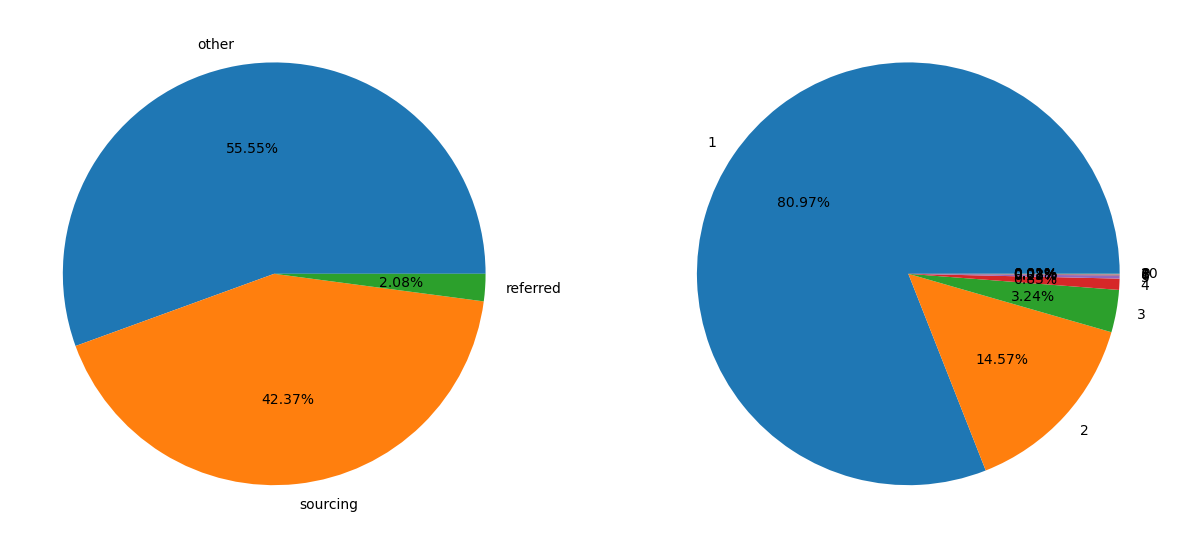

In [15]:
data1=hr_train.recruitment_channel.value_counts()
data2=hr_train.no_of_trainings.value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.pie(data1,autopct="%1.2f%%",labels=data1.index)
ax2.pie(data2,autopct="%1.2f%%",labels=data2.index)
plt.show()

In [16]:
data3=hr_train[['previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']]

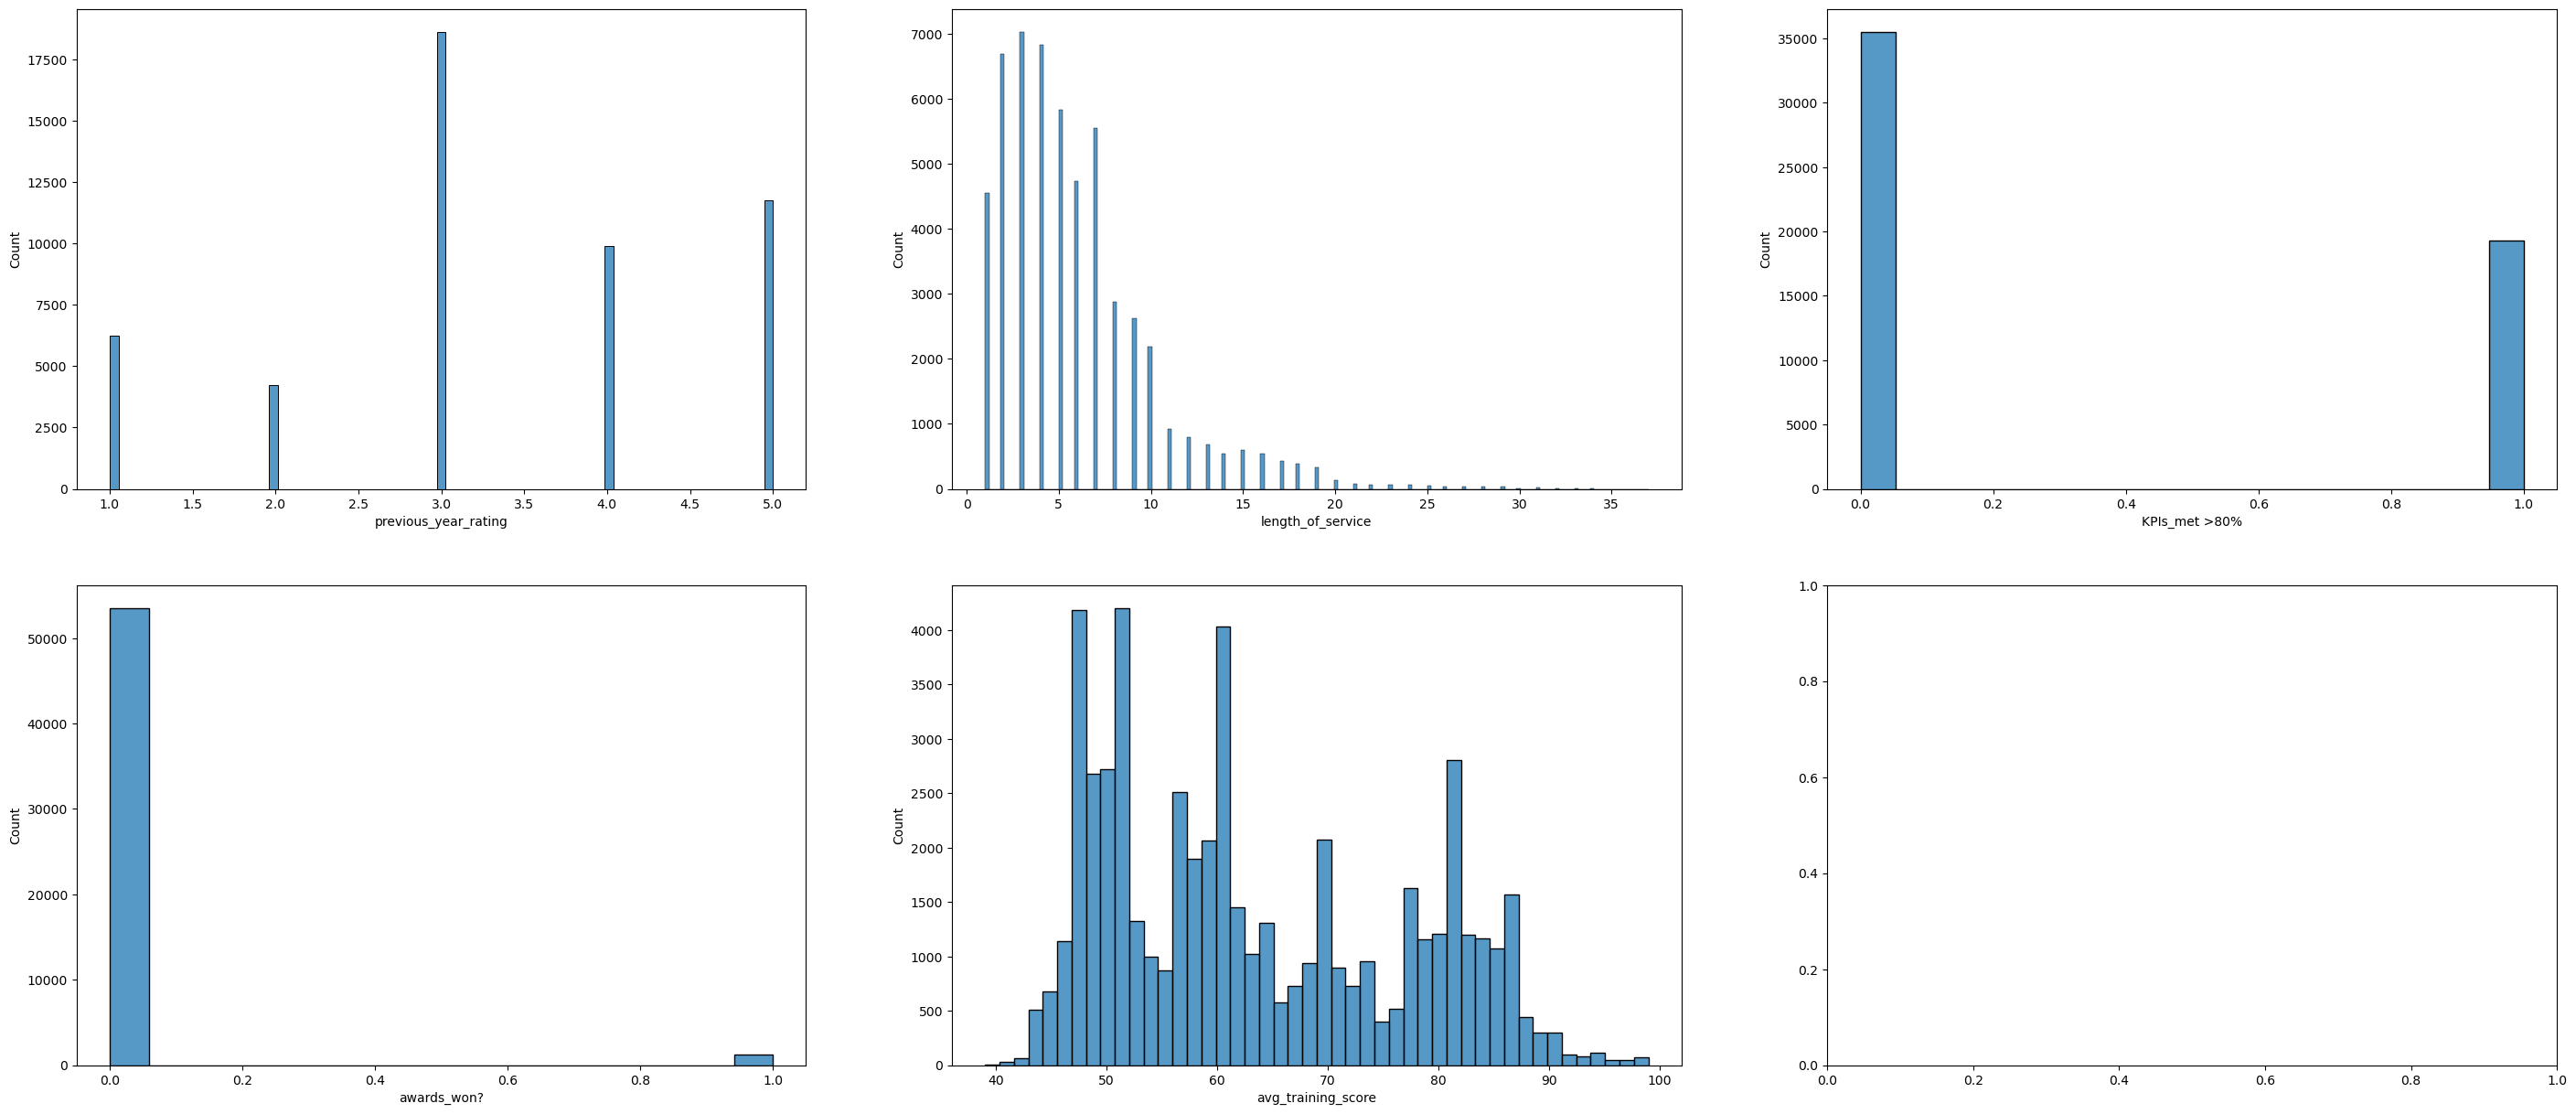

In [17]:
fig , ax=plt.subplots(nrows = 2, ncols = 3, figsize=(35,15))
for variable, subplot in zip(data3, ax.flatten()):
        sns.histplot(hr_train[variable], ax = subplot)
plt.show()

# MISSING VALUE TREATMENT

In [18]:
hr_test["is_promoted"]="test"

In [19]:
combined_hr=pd.concat([hr_test,hr_train],axis=0)

In [20]:
combined_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 9.0+ MB


In [21]:
combined_hr.isnull().sum().sort_values(ascending=False)/combined_hr.shape[0]

previous_year_rating    0.075813
education               0.043973
employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [22]:
combined_hr.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [23]:
combined_hr.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [24]:
combined_hr.previous_year_rating=combined_hr.previous_year_rating.fillna(combined_hr.previous_year_rating.median())

In [25]:
combined_hr.education=combined_hr.education.fillna(combined_hr.education.value_counts().idxmax())

In [26]:
combined_hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [27]:
train_h=combined_hr[combined_hr.is_promoted!="test"]

# HYPOTHESIS TESTING

In [28]:
train_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 6.3+ MB


In [29]:
train_h.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [30]:
# TEST NULL NO ASSOCIATION BETWEEN DEPARTMENT AND IS PROMOTED
pd.crosstab(train_h.department,train_h.is_promoted)

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [31]:
from scipy.stats import chi2_contingency

In [32]:
chi2_contingency(pd.crosstab(train_h.department,train_h.is_promoted))
# since p value 9.882497107474632e-29 less than 0.05, reject null

(151.4263551632387,
 9.882497107474632e-29,
 8,
 array([[ 4896.1699022 ,   455.8300978 ],
        [ 2320.00875785,   215.99124215],
        [ 2212.05882353,   205.94117647],
        [  950.50831995,    88.49168005],
        [10381.49029339,   966.50970661],
        [ 6530.05619618,   607.94380382],
        [  913.91512188,    85.08487812],
        [15405.73638885,  1434.26361115],
        [ 6530.05619618,   607.94380382]]))

In [33]:
# TEST NULL NO ASSOCIATION BETWEEN EDUCATION AND IS PROMOTED
pd.crosstab(train_h.education,train_h.is_promoted)

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


In [34]:
chi2_contingency(pd.crosstab(train_h.education,train_h.is_promoted))
# since p value 5.3808089671607115e-11 less than 0.05, reject null

(47.29119458884267,
 5.3808089671607115e-11,
 2,
 array([[35749.72485769,  3328.27514231],
        [  736.43811122,    68.56188878],
        [13653.83703109,  1271.16296891]]))

In [35]:
# TEST NULL NO ASSOCIATION BETWEEN RECRUITMENT CHANNEL AND IS PROMOTED
pd.crosstab(train_h.recruitment_channel,train_h.is_promoted)

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [36]:
chi2_contingency(pd.crosstab(train_h.recruitment_channel,train_h.is_promoted))
# since p value 6.650937825577018e-05 less than 0.05, reject null

(19.23633518768639,
 6.650937825577018e-05,
 2,
 array([[27852.91271347,  2593.08728653],
        [ 1044.73580499,    97.26419501],
        [21242.35148154,  1977.64851846]]))

In [37]:
# TEST NULL NO ASSOCIATION BETWEEN AGE AND IS PROMOTED
train_h.age.groupby(train_h.is_promoted).mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

In [38]:
train_h.age.groupby(train_h.is_promoted).var()

is_promoted
0    59.454564
1    50.146918
Name: age, dtype: float64

In [39]:
# splitdata
promoted0=train_h[train_h.is_promoted==0]
promoted1=train_h[train_h.is_promoted==1]

In [40]:
print(promoted0.shape)
print(promoted1.shape)

(50140, 14)
(4668, 14)


In [41]:
from scipy.stats import ttest_ind

In [42]:
ttest_ind(promoted0.age,promoted1.age,equal_var=False)
# sincep value 1.6363839947815405e-05 less than 0.05, reject null

Ttest_indResult(statistic=4.31315199629288, pvalue=1.6363839947815405e-05)

In [43]:
# TEST NULL NO ASSOCIATION BETWEEN length_of_service and is promoted
train_h.length_of_service.groupby(train_h.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [44]:
train_h.length_of_service.groupby(train_h.is_promoted).var()

is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64

In [45]:
ttest_ind(promoted0.length_of_service,promoted1.length_of_service,equal_var=False)
# sincep value 0.008262946987836755 less than 0.05, reject null

Ttest_indResult(statistic=2.6420549711884886, pvalue=0.008262946987836755)

In [46]:
# TEST NULL NO ASSOCIATION BETWEEN avg_training_score and ispromoted
train_h.avg_training_score.groupby(train_h.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [47]:
train_h.avg_training_score.groupby(train_h.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [48]:
ttest_ind(promoted0.avg_training_score,promoted1.avg_training_score,equal_var=False)
# sincep value 7.662329172468838e-291 less than 0.05, reject null

Ttest_indResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291)

# LABLE ENCODING AND SCALING

In [49]:
objectcols=combined_hr.select_dtypes(include="object")
numericcols=combined_hr.select_dtypes(include=np.number)

In [50]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           78298 non-null  object
 1   region               78298 non-null  object
 2   education            78298 non-null  object
 3   gender               78298 non-null  object
 4   recruitment_channel  78298 non-null  object
 5   is_promoted          78298 non-null  object
dtypes: object(6)
memory usage: 4.2+ MB


In [51]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   no_of_trainings       78298 non-null  int64  
 2   age                   78298 non-null  int64  
 3   previous_year_rating  78298 non-null  float64
 4   length_of_service     78298 non-null  int64  
 5   KPIs_met >80%         78298 non-null  int64  
 6   awards_won?           78298 non-null  int64  
 7   avg_training_score    78298 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [52]:
numericcols["is_promoted"]=objectcols.is_promoted

In [53]:
objectcols=objectcols.drop("is_promoted",axis=1)

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [57]:
objectcols_encode.head()

,department,region,education,gender,recruitment_channel
0,8,18,0,1,2
1,2,28,0,0,0
2,7,4,0,1,0
3,5,11,0,0,0
4,1,21,0,1,2


In [58]:
numericcols.drop("is_promoted",axis=1).corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,1.000000,-0.005216,0.000586,0.001264,0.004420,0.000127,0.005943,-0.003930
no_of_trainings,-0.005216,1.000000,-0.082536,-0.057310,-0.058403,-0.043912,-0.004818,0.044180
age,0.000586,-0.082536,1.000000,0.030097,0.653339,-0.026223,-0.007357,-0.044592
previous_year_rating,0.001264,-0.057310,0.030097,1.000000,0.024656,0.336612,0.026524,0.068547
length_of_service,0.004420,-0.058403,0.653339,0.024656,1.000000,-0.077854,-0.040556,-0.035272
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.336612,-0.077854,1.000000,0.100365,0.076729
awards_won?,0.005943,-0.004818,-0.007357,0.026524,-0.040556,0.100365,1.000000,0.072655
avg_training_score,-0.003930,0.044180,-0.044592,0.068547,-0.035272,0.076729,0.072655,1.000000


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
numericcols_scaled=scaler.fit_transform(numericcols.drop("is_promoted",axis=1))

In [62]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols.columns[0:8])

In [63]:
numericcols_scaled=numericcols_scaled.reset_index()

In [64]:
objectcols_encode=objectcols_encode.reset_index()

In [65]:
hr_clean=pd.concat([numericcols_scaled,objectcols_encode],axis=1)

In [66]:
numericcols=numericcols.reset_index()

In [67]:
hr_clean["is_promoted"]=numericcols.is_promoted

In [68]:
train_clean=hr_clean[hr_clean.is_promoted!="test"]
test_clean=hr_clean[hr_clean.is_promoted=="test"]

In [69]:
print(train_clean.info())
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 23490 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 54808 non-null  int64  
 1   employee_id           54808 non-null  float64
 2   no_of_trainings       54808 non-null  float64
 3   age                   54808 non-null  float64
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  float64
 6   KPIs_met >80%         54808 non-null  float64
 7   awards_won?           54808 non-null  float64
 8   avg_training_score    54808 non-null  float64
 9   index                 54808 non-null  int64  
 10  department            54808 non-null  int32  
 11  region                54808 non-null  int32  
 12  education             54808 non-null  int32  
 13  gender                54808 non-null  int32  
 14  recruitment_channel   54808 non-null  int32  
 15  is_promoted    

# MODEL BUILDING

In [70]:
y=train_clean.is_promoted
X=train_clean.drop(["is_promoted","index","employee_id"],axis=1)

In [71]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 54808 entries, 23490 to 78297
Series name: is_promoted
Non-Null Count  Dtype 
--------------  ----- 
54808 non-null  object
dtypes: object(1)
memory usage: 856.4+ KB


In [72]:
y=y.astype("int64")

In [73]:
y.head()

23490    0
23491    0
23492    0
23493    0
23494    0
Name: is_promoted, dtype: int64

<AxesSubplot: >

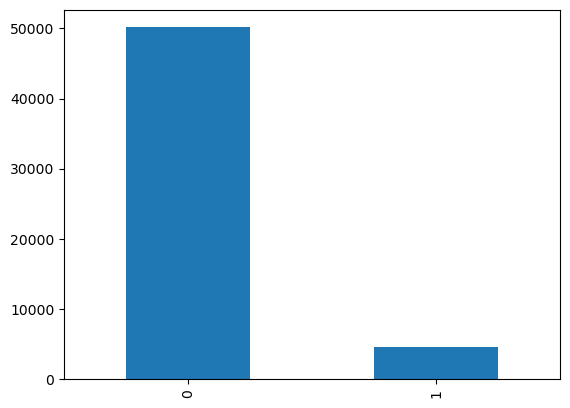

In [75]:
y.value_counts().plot(kind="bar")  # IMBALANCE DATA 

In [76]:
from imblearn.over_sampling import SMOTEN

In [77]:
smote_os = SMOTEN(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X,y)

In [78]:
print(y.value_counts())
print(y_smote.value_counts())

0    50140
1     4668
Name: is_promoted, dtype: int64
0    50140
1    50140
Name: is_promoted, dtype: int64


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logit=LogisticRegression(max_iter=80)

In [81]:
logitmodel=logit.fit(X_smote,y_smote)

In [82]:
logitmodel.score(X_smote,y_smote)

0.7585759872357399

In [83]:
cross_val_score(logit,X_smote,y_smote)

array([0.72282609, 0.76480854, 0.76017152, 0.7672517 , 0.77074192])

In [84]:
logitpredict=logit.predict(X_smote)

In [85]:
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     50140
           1       0.75      0.77      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



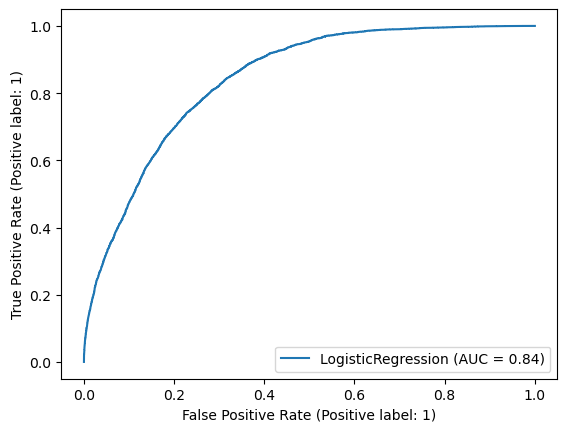

In [86]:
RocCurveDisplay.from_estimator(logit,X_smote,y_smote)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
tree=DecisionTreeClassifier(max_depth=15)

In [89]:
treemodel=tree.fit(X_smote,y_smote)

In [90]:
treemodel.score(X_smote,y_smote)

0.9273135221380135

In [91]:
cross_val_score(tree,X_smote,y_smote)

array([0.82409254, 0.91548664, 0.91563622, 0.91773036, 0.92002393])

In [92]:
treepredict=tree.predict(X_smote)

In [93]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     50140
           1       0.89      0.97      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



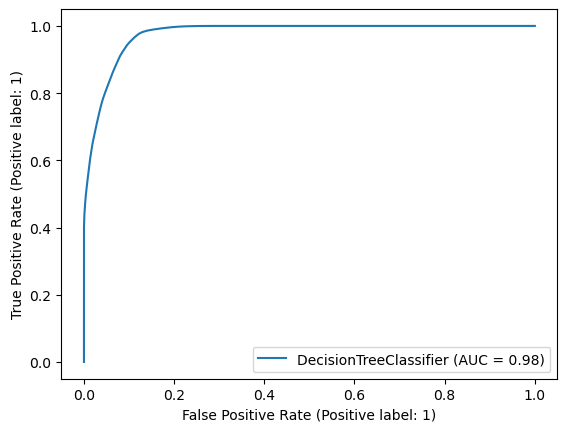

In [94]:
RocCurveDisplay.from_estimator(tree,X_smote,y_smote)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf=RandomForestClassifier(n_estimators=500,max_depth=10)

In [97]:
rfmodel=rf.fit(X_smote,y_smote)

In [98]:
rfmodel.score(X_smote,y_smote)

0.8693657758276825

In [99]:
cross_val_score(rf,X_smote,y_smote)

array([0.793927  , 0.87509972, 0.87280614, 0.87495014, 0.88123255])

In [100]:
rfpredict=rf.predict(X_smote)

In [101]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     50140
           1       0.83      0.92      0.88     50140

    accuracy                           0.87    100280
   macro avg       0.87      0.87      0.87    100280
weighted avg       0.87      0.87      0.87    100280



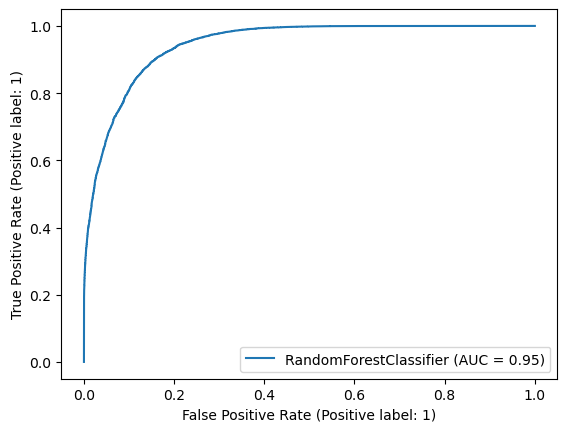

In [102]:
RocCurveDisplay.from_estimator(rf,X_smote,y_smote)